<a href="https://colab.research.google.com/github/Ujjwal1khadka/Data-Science-and-Business-Analytics-Intern/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THE SPARKS FOUNDATION

DATA SCIENCE & BUSINESS ANALYTICS

GRIP SEPTEMBER 2022

TASK #03 : EXPLORATORY DATA ANALYSIS : RETAIL

DESCRIPTION :Perform EDA on dataset "SampleSuperstore"

EXECUTED BY : Ujjwal Khadka


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings as wg
wg.filterwarnings('ignore')


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/mrgautambhagat/datasets/main/samplesuperstore.csv")
data.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [ ]:
data.shape

(9994, 13)

In [ ]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [ ]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [ ]:
data.drop('Postal Code',inplace=True,axis=1)

In [ ]:
data.duplicated().sum()

50

In [ ]:
data.drop_duplicates()
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


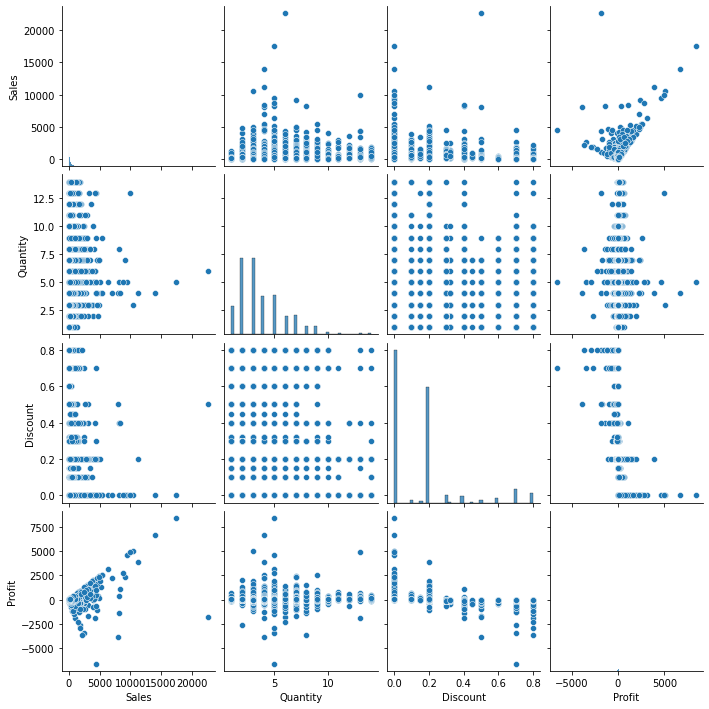

In [ ]:
sns.pairplot(data)

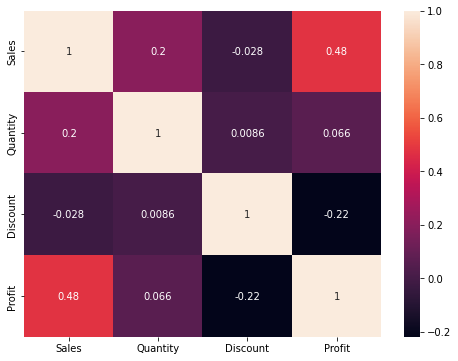

In [ ]:
data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

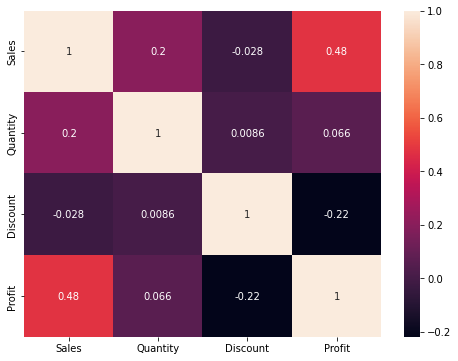

In [ ]:
data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

<Figure size 720x576 with 0 Axes>

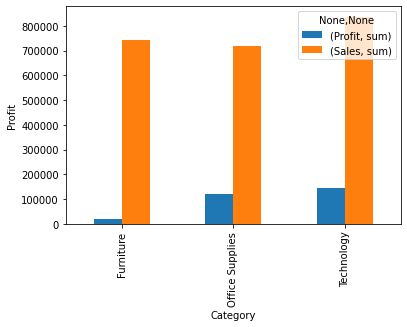

In [ ]:
plt.figure(figsize=(10,8))
data.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

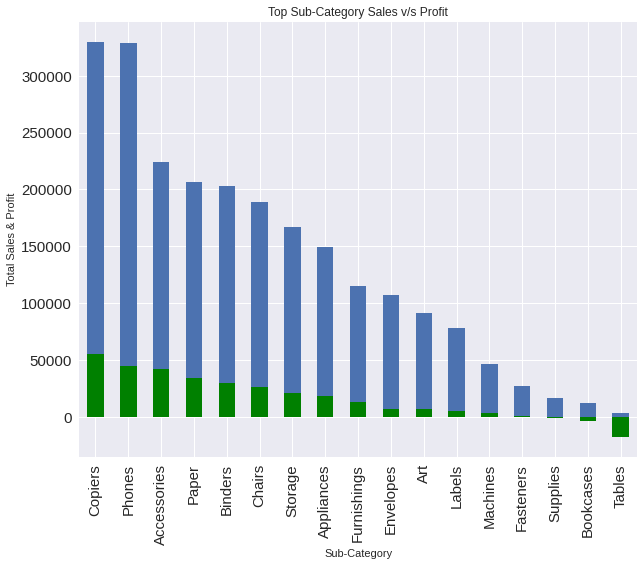

In [ ]:
top_subcategory_sales = data.groupby("Sub-Category").Sales.sum().nlargest(n=100)

top_subcategory_profit = data.groupby("Sub-Category").Profit.sum().nlargest(n=100)
plt.style.use('seaborn')
top_subcategory_sales.plot(kind='bar',figsize=(10,8),fontsize=15)
top_subcategory_profit.plot(kind='bar',figsize=(10,8),fontsize=15,color='green')
plt.xlabel('Sub-Category')
plt.ylabel('Total Sales & Profit')
plt.title('Top Sub-Category Sales v/s Profit')
plt.show()

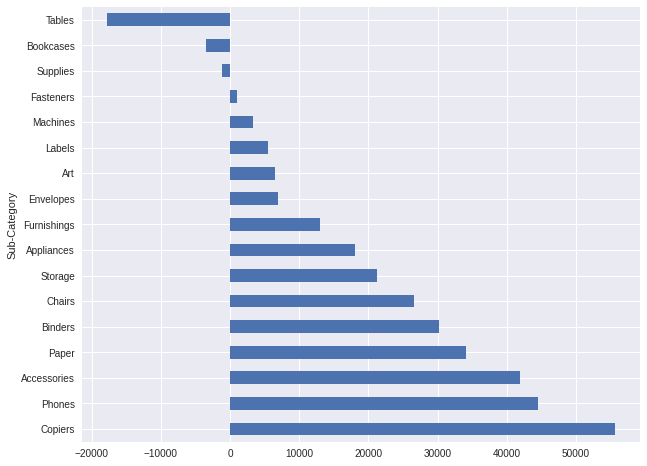

In [ ]:
plt.figure(figsize=(10,8))
category_wise_profit=data.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
category_wise_profit.plot.barh()

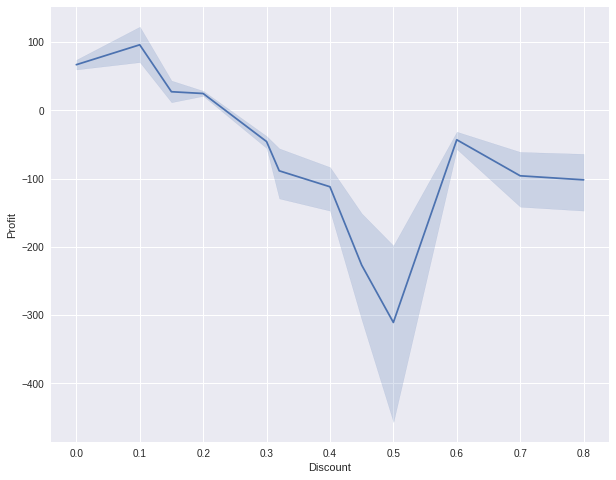

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(data['Discount'],data['Profit'],data=data)

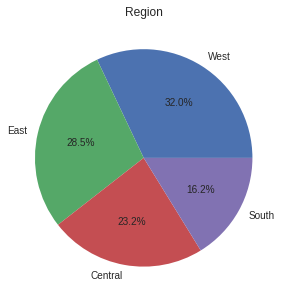

In [ ]:
plt.figure(figsize=(5,5))
plt.title("Region")
plt.pie(data['Region'].value_counts(),labels=data['Region'].value_counts().index,autopct="%1.1f%%")
plt.show()

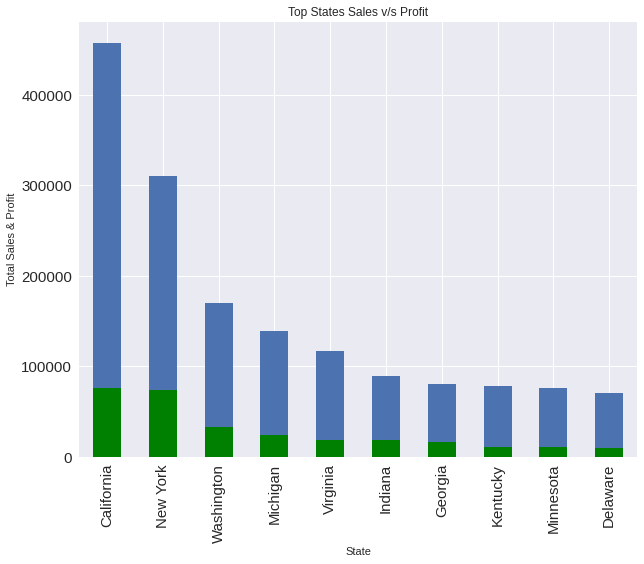

In [ ]:
top_state_sales = data.groupby("State").Sales.sum().nlargest(n=10)
top_state_profit = data.groupby("State").Profit.sum().nlargest(n=10)

plt.style.use('seaborn')
top_state_sales.plot(kind='bar',figsize=(10,8),fontsize=15)
top_state_profit.plot(kind='bar',figsize=(10,8),fontsize=15,color='green')
plt.xlabel('State')
plt.ylabel('Total Sales & Profit')
plt.title('Top States Sales v/s Profit')
plt.show()

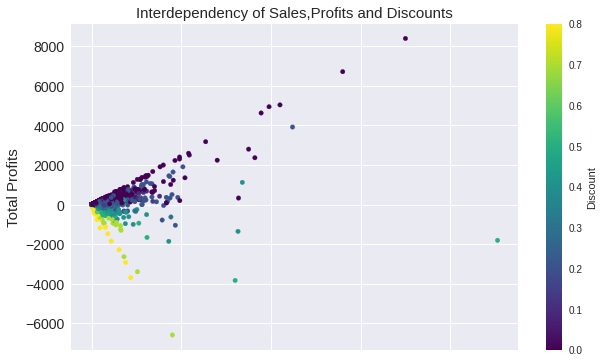

In [ ]:
plt.style.use('seaborn')
data.plot(kind='scatter',figsize=(10,6),x='Sales',y='Profit',c='Discount',s=20,fontsize=14,colormap='viridis')
plt.ylabel('Total Profits',fontsize=15)
plt.title('Interdependency of Sales,Profits and Discounts',fontsize=15)
plt.show()